In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math
import scipy.stats as stats
from textblob import TextBlob
import csv
import wordcloud as wc
import re

In [4]:
#Reads in the csv file as a dataframe as I will be using pandas for my data manipulation
spotify = pd.read_csv("spotify_millsongdata.csv")

#Creates a list of "meaningless" words that will later be removed
STOPWORDS = ["i", "a", "an", "and", "the", "on", "of", "in", "with", "you",
             "me", "to", "at", "for","\r\n", " "]

#Prints the head and tail of the spotify dataset to check its all good
print(spotify.head())
print(spotify.tail())

  artist                   song                                        link  \
0   ABBA  Ahe's My Kind Of Girl  /a/abba/ahes+my+kind+of+girl_20598417.html   
1   ABBA       Andante, Andante       /a/abba/andante+andante_20002708.html   
2   ABBA         As Good As New        /a/abba/as+good+as+new_20003033.html   
3   ABBA                   Bang                  /a/abba/bang_20598415.html   
4   ABBA       Bang-A-Boomerang      /a/abba/bang+a+boomerang_20002668.html   

                                                text  
0  Look at her face, it's a wonderful face  \r\nA...  
1  Take it easy with me, please  \r\nTouch me gen...  
2  I'll never know why I had to go  \r\nWhy I had...  
3  Making somebody happy is a question of give an...  
4  Making somebody happy is a question of give an...  
             artist           song  \
57645  Ziggy Marley  Good Old Days   
57646  Ziggy Marley  Hand To Mouth   
57647          Zwan   Come With Me   
57648          Zwan         Desire   
57649

## Part 1: Loading and Pre-processing text

In [5]:
#By using the applymap function I can apply a change to the entire datafram, in this case I lower-cased 
#and striped everything
spotify = spotify.applymap(lambda x : x.lower().strip())

In [6]:
#In this I replaced all the punctuation and weird regex symbols in the lyrics with simple blank space.
for i in spotify.columns:
    spotify[i] = spotify[i].replace('[^\w\s]', '', regex=True)

spotify.text = spotify.text.replace('\r\n', '', regex=True)

In [7]:
#I replaced any numbers with blank space
for i in spotify.columns:
    spotify[i] = spotify[i].replace('\d', '', regex=True)
    

In [8]:
#This removes any of the meaningless characters in the lyrics
spotify['text'] = spotify['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (STOPWORDS)]))
spotify

,artist,song,link,text
0,abba,ahes my kind of girl,aabbaahesmykindofgirl_html,look her face its wonderful face it means some...
1,abba,andante andante,aabbaandanteandante_html,take it easy please touch gently like summer e...
2,abba,as good as new,aabbaasgoodasnew_html,ill never know why had go why had put up such ...
3,abba,bang,aabbabang_html,making somebody happy is question give take ca...
4,abba,bangaboomerang,aabbabangaboomerang_html,making somebody happy is question give take ca...
...,...,...,...,...
57645,ziggy marley,good old days,zziggymarleygoodolddays_html,irie days come play let angels fly let devils ...
57646,ziggy marley,hand to mouth,zziggymarleyhandtomouth_html,power workers more power power workers we need...
57647,zwan,come with me,zzwancomewithme_html,all need is something ill believe flashlights ...
57648,zwan,desire,zzwandesire_html,northern star am frightened where can go rest ...


In [9]:
#A function to transform an inputted dataframe into a list of its words
#This is to make it easier when I need to iterate through an entire set of lyrics word-by-word
def wordlistmaker(text):
    wordlist = []
    for word in text:
        words=word.split(" ")
        for i in words:
            wordlist.append(i)
    return wordlist

## Part 2: Analysing Text

In [10]:
#I create a list of all the distinct artist names to make it easier for the program to locate the artist
artistnames = spotify['artist']
#By converting it into a dictionary and back into a list, I get rid of duplicates
artistnames = list(dict.fromkeys(artistnames))

In [11]:
def artist_frequency(artist1):
    #Input: An artist name
    #Returns the frequency of each word and the value of Vocab Richness
    
    #Making sure the artist name is cleaned up and sets up all the variables
    artist1 = artist1.lower().strip()
    frequency = {}
    v_rich = 0
    count = 0
    
    #Checks if the artist is in the database
    if artist1 in artistnames:
        #Sets a small dataframe of just that artists lyrics
        a = wordlistmaker(spotify[spotify.artist.isin([artist1])]['text'])
        #Iterates through the dataframe of lyrics and makes a frequency dictionary of each word
        for i, j in enumerate(a):
            count += 1
            if j not in frequency:
                frequency[j] = 1
            if j in frequency:
                frequency[j]+=1
        #Calculates the V richness
        v_rich = len(frequency)/count
        return frequency, v_rich
        
    else:
        #if the names are not in the database then it raises an error
        raise Exception("Artist is not in database")

#Function to compute the average sentiment score of an artist
def avg_sentiment(data):
    #Input the dataset of an artist
    avg = 0
    all_pols = []
    subs = []
    
    #loops through the dataset and adds the sentiment to a list
    for word in data:
        sub = TextBlob(word).sentiment.subjectivity 
        subs.append(sub)
        
        pol = TextBlob(word).sentiment.polarity 
        all_pols.append(pol)
        
    #returns the average sentiment
    return sum(all_pols) / len(all_pols)


#A function to pull out a list of every common word from the artist
def common_words(list1, list2):
    #input 2 lists of lyrics and then finds every common word
    word = []
    a = wordlistmaker(list1)
    b = wordlistmaker(list2)
    for i in a:
        if i in b:
            if i not in word:
                word.append(i)
    return word


In [12]:
#Asks the user to input 2 artists to continue the program with 
artist1 = input("Enter an Artist ")
artist2 = input("Enter another Artist ")

Enter an Artist abba
Enter another Artist zwan


In [13]:
#Calculates the word frequency and V_richness of the Artist1
frequency1, v_rich1 = artist_frequency(artist1)
frequency1

{'look': 48,
 'her': 39,
 'face': 27,
 'its': 140,
 'wonderful': 4,
 'it': 435,
 'means': 9,
 'something': 24,
 'special': 12,
 'way': 76,
 'that': 257,
 'she': 74,
 'smiles': 3,
 'when': 151,
 'sees': 3,
 'how': 73,
 'lucky': 3,
 'can': 160,
 'one': 116,
 'fellow': 6,
 'be': 202,
 'shes': 25,
 'just': 109,
 'my': 358,
 'kind': 21,
 'girl': 65,
 'makes': 15,
 'feel': 81,
 'fine': 15,
 'who': 46,
 'could': 86,
 'ever': 34,
 'believe': 33,
 'mine': 8,
 'without': 22,
 'im': 229,
 'blue': 28,
 'if': 144,
 'leaves': 8,
 'what': 116,
 'do': 130,
 'we': 202,
 'go': 101,
 'walk': 13,
 'park': 9,
 'holds': 2,
 'squeezes': 2,
 'hand': 25,
 'well': 57,
 'walking': 12,
 'hours': 4,
 'talking': 5,
 'about': 36,
 'all': 204,
 'things': 22,
 'plan': 3,
 'take': 93,
 'easy': 22,
 'please': 36,
 'touch': 8,
 'gently': 3,
 'like': 154,
 'summer': 28,
 'evening': 7,
 'breeze': 7,
 'your': 206,
 'time': 82,
 'make': 78,
 'slow': 7,
 'andante': 21,
 'let': 83,
 'feeling': 48,
 'grow': 10,
 'fingers': 11,


In [14]:
frequency2, v_rich2 = artist_frequency(artist2)
frequency2

{'baby': 18,
 'lets': 15,
 'rock': 12,
 'im': 23,
 'greatest': 6,
 'thing': 7,
 'youve': 6,
 'got': 11,
 'good': 8,
 'way': 6,
 'suppose': 3,
 'exactly': 2,
 'where': 6,
 'are': 22,
 'is': 23,
 'not': 13,
 'so': 24,
 'from': 12,
 'lead': 4,
 'balloon': 2,
 'inside': 2,
 'your': 26,
 'room': 3,
 'ill': 21,
 'drop': 2,
 'sparks': 2,
 'can': 21,
 'kick': 2,
 'cry': 5,
 'fuss': 2,
 'but': 15,
 'there': 5,
 'time': 23,
 'loves': 3,
 'go': 14,
 'grab': 3,
 'brand': 3,
 'new': 5,
 'shoes': 3,
 'ive': 12,
 'taken': 4,
 'care': 6,
 'everything': 5,
 'when': 9,
 'cant': 8,
 'know': 10,
 'tying': 2,
 'knots': 2,
 'my': 72,
 'rings': 3,
 'set': 2,
 'stone': 2,
 'every': 4,
 'single': 3,
 'wish': 3,
 'still': 5,
 'lie': 4,
 'machine': 2,
 'adjust': 2,
 'scenes': 2,
 'turn': 4,
 'back': 6,
 'clocks': 2,
 'bitch': 2,
 'moan': 2,
 'theres': 11,
 'no': 34,
 'wont': 10,
 'abuse': 2,
 'dream': 3,
 'about': 4,
 'night': 9,
 'do': 10,
 'youre': 2,
 'holding': 2,
 'tight': 2,
 'id': 2,
 'love': 26,
 'somebo

In [15]:
A1Frame = wordlistmaker(spotify[spotify.artist.isin([artist1])]['text'])
avg_sentiment(A1Frame)


0.013542211771466896

In [16]:
A2Frame = wordlistmaker(spotify[spotify.artist.isin([artist2])]['text'])
avg_sentiment(A2Frame)

0.00957136313144601

In [17]:
common = common_words(A2Frame, A1Frame)
common

['baby',
 'lets',
 'rock',
 'im',
 'thing',
 'youve',
 'got',
 'good',
 'way',
 'suppose',
 'exactly',
 'where',
 'are',
 'is',
 'not',
 'so',
 'from',
 'lead',
 'balloon',
 'inside',
 'your',
 'room',
 'ill',
 'drop',
 'can',
 'kick',
 'cry',
 'fuss',
 'but',
 'there',
 'time',
 'loves',
 'go',
 'new',
 'shoes',
 'ive',
 'taken',
 'care',
 'everything',
 'when',
 'cant',
 'know',
 'my',
 'set',
 'stone',
 'every',
 'single',
 'wish',
 'still',
 'lie',
 'machine',
 'scenes',
 'turn',
 'back',
 'theres',
 'no',
 'wont',
 'dream',
 'about',
 'night',
 'do',
 'youre',
 'holding',
 'tight',
 'id',
 'love',
 'somebody',
 'like',
 'life',
 'should',
 'hope',
 'even',
 'gone',
 'changed',
 'all',
 'half',
 'soul',
 'wanted',
 'was',
 'here',
 'next',
 'little',
 'sunshine',
 'sympathy',
 'now',
 'everybody',
 'knows',
 'that',
 'been',
 'hanging',
 'down',
 'low',
 'cause',
 'feeling',
 'up',
 'soon',
 'be',
 'out',
 'cold',
 'wondering',
 'will',
 'call',
 'high',
 'left',
 'dead',
 'sometim

## Part 3: Visualising Text

In [18]:
def wordCloud(artist1,artist2):
    #function to create a wordcloud based on two inputted artists
    fig = plt.figure(figsize = (4,2), dpi= 200)
    
    a1 = spotify[spotify.artist.isin([artist1])]['text']
    a1 = str(a1)
    a2 = spotify[spotify.artist.isin([artist2])]['text']
    a2 = str(a2)
    
    cloud = wc.WordCloud()
    cloud1 = cloud.generate(a1)
    fig.add_subplot(2,1,1)
    plt.imshow(cloud1)
    plt.title(artist1)
    plt.axis('off')
    
    cloud2 = cloud.generate(a2)
    fig.add_subplot(2,1,2)
    plt.imshow(cloud2)
    plt.title(artist2)
    plt.axis('off')
    
def senti_plot(data, title):
    #Creates a scatter plot of the sentiment analyis
    avg = 0
    all_pols = []
    subs = []
    
    for word in data:
        sub = TextBlob(word).sentiment.subjectivity 
        subs.append(sub)
        
        pol = TextBlob(word).sentiment.polarity 
        all_pols.append(pol)
    sns.scatterplot(x = subs, y=all_pols).set_title(title)

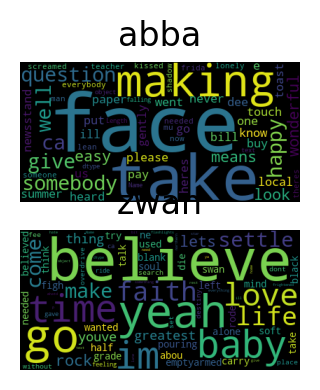

In [19]:
wordCloud(artist1 , artist2)

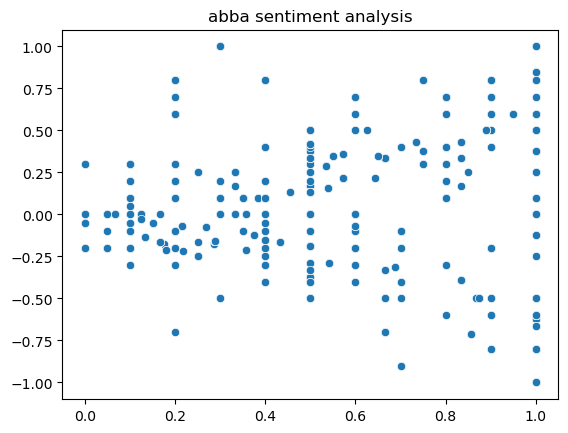

In [20]:
senti_plot(A1Frame, f'{artist1} sentiment analysis')

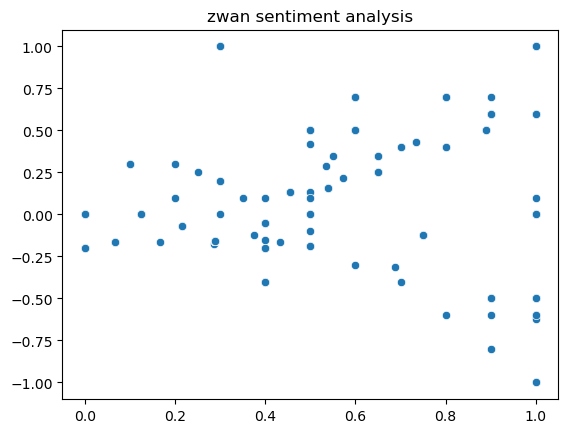

In [21]:
senti_plot(A2Frame, f'{artist2} sentiment analysis')

In [22]:
def count_common_words(artist):
    #Function to count how often the similar words appear in each artist's lyrics
    f,v = artist_frequency(artist)
    common_word_counts = {}
    for i in common:
        common_word_counts[i] = f[i]
    #returns the dictionary with words being the keys and the number being the values
    return common_word_counts

#makes a dataframe to store the dictionaries
common_df = pd.DataFrame()

In [23]:
#adds the artist1 count to the DF
common_df[artist1] = count_common_words(artist1)

In [24]:
#Adds the artist2 count to the DF
common_df[artist2] = count_common_words(artist2)

Text(0.5, 1.0, 'abba vs zwan frequency heat map')

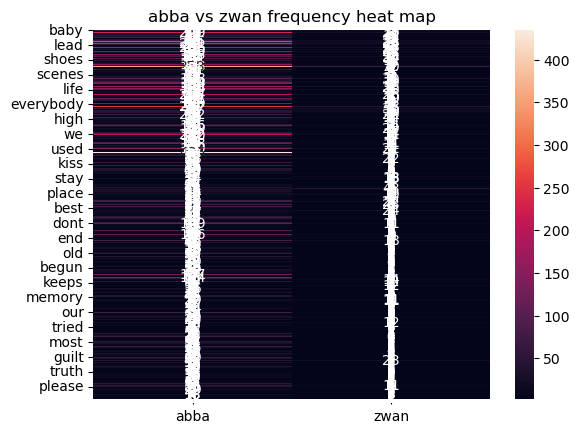

In [25]:
#Creates the heatmap 
sns.heatmap(common_df, annot= True, fmt = 'g').set_title(f'{artist1} vs {artist2} frequency heat map')

## Part 4: Generating Text

In [26]:
import random
#Makes function for ngrams 
def ngrams_generator(list, n):
    words = []
    for i in list:
        words += i.split()
    
    ngrams = zip(*[words[i:] for i in range(n)])
    # Concatentate into ngrams 
    return [" ".join(ngram) for ngram in ngrams]


In [27]:
#Creates two ngram lists for each artist
n1 = ngrams_generator(A1Frame,5)

In [28]:
n2 = ngrams_generator(A2Frame,5)

In [29]:
#Allows users to generate lyrics based on an inputted length
def generate_lyrics(lyric1, lyric2, length):
    lyrics = lyric1 + lyric2
    words = []
    next_word = random.choice(lyrics)
    words.append(next_word)
    
    while len(words)<length:
        next_word = random.choice(lyrics)
        words.append(next_word)
    
    return " ".join(words)

In [30]:
print(generate_lyrics(n1, n2, 50))

spend our lives together forever say prayer relief from endless die heart child is your beautiful gardens full flowers songs would weave until final hour once more like did before honey honey how thrills ahhah do fade away from truth bluest men this town cause la la la la being irresistible kind creature that forever that could make it guess could see light if it its new hotel live your think that could make it that could gleam without theres grow size all see is theres nothing there see no thing younger than blush spring questions am left scorn drugs move how treasure every minute fernando though never thought that if we dont we might hawaii after all had go blowing through trees rain fell shy uncertain everybody seems think oh so sad so quiet heels breaking her way pushing sing it gonna give sweet are hero my dreams can left all saw myself as as well lay down die nosotros dos en proteccion fernando was somewhere else instead one times had few fights we showed course but baby ive craz

## Part 5: Reflection

While working on this project I found myself repeatedly looking back on past labs and researching new skills to implement for this project. 

For certain parts of this project I found that writing down my step-by-step thinking process in pseudo-code helped immensely with organizing my thoughts and ideas. For example, in Part 2 I mapped out exactly what functions I would need to create and how I would utilize them. I learned that when writing code I need to stay organized and work in a step-by-step process to ensure each part of my code works and melds together. 

Some struggles I found were that there were certain parts of the project I just simply didn't know how to do like Vocabulary Richness and Sentiment Scores, but after some independent research and looking back on notes I learned how to do these functions. I really found the whole sentiment analysis part of this project interesting and would love to explore this side of NLP further and learn how to implement sentiment analysis to affect the outcome of my projects. 

I thought that in general my solutions to the program had been effective but I wish that my coding skills had been more refined so that my solution could be more elegant and streamlined. For example there had been various parts in my code that I felt had just not been optimized like generating the word cloud. In future revisions of my code I would love to optimize my code to be more streamlined. 

## Part 6: Extra
For my extra part of the assignment I wanted to create a program that allows the user to input an artist and take their top 5 most and least positive songs. From there it will create a word cloud to see which words are most common and see if there are any common words between the two groups. From there I will generate lyrics based solely on postive, solely on negative, and a combination 

In [31]:
#Asks for user input
artist = input("Enter an artist")

Enter an artistabba


In [37]:
#Gets a dataframe for just that artist
artist = spotify[spotify.artist.isin([artist1])]

In [39]:
artist

,artist,song,link,text
0,abba,ahes my kind of girl,aabbaahesmykindofgirl_html,look her face its wonderful face it means some...
1,abba,andante andante,aabbaandanteandante_html,take it easy please touch gently like summer e...
2,abba,as good as new,aabbaasgoodasnew_html,ill never know why had go why had put up such ...
3,abba,bang,aabbabang_html,making somebody happy is question give take ca...
4,abba,bangaboomerang,aabbabangaboomerang_html,making somebody happy is question give take ca...
...,...,...,...,...
108,abba,what about livingstone,aabbawhataboutlivingstone_html,went buy paper local newsstand then heard them...
109,abba,when all is said and done,aabbawhenallissaiddone_html,heres us one more toast then well pay bill dee...
110,abba,when i kissed the teacher,aabbawhenikissedtheteacher_html,everybody screamed when kissed teacher they mu...
111,abba,why did it have to be me,aabbawhydidithavetobeme_html,when were lonely needed man someone lean well ...


In [59]:
#creates a copy of the dataframe and makes a new columb 
#specifically for the sentiment scores
a_copy = artist.copy()
a_copy['sentiment'] = a_copy['text'].apply(lambda x: TextBlob(x).sentiment)

In [60]:
a_copy

,artist,song,link,text,sentiment,polarity,subjectivity
0,abba,ahes my kind of girl,aabbaahesmykindofgirl_html,look her face its wonderful face it means some...,"(0.4476190476190476, 0.654978354978355)",0.447619,0.654978
1,abba,andante andante,aabbaandanteandante_html,take it easy please touch gently like summer e...,"(0.20222222222222216, 0.5436111111111112)",0.202222,0.543611
2,abba,as good as new,aabbaasgoodasnew_html,ill never know why had go why had put up such ...,"(0.28181216931216935, 0.5507936507936508)",0.281812,0.550794
3,abba,bang,aabbabang_html,making somebody happy is question give take ca...,"(0.3142857142857143, 0.6327380952380951)",0.314286,0.632738
4,abba,bangaboomerang,aabbabangaboomerang_html,making somebody happy is question give take ca...,"(0.3142857142857143, 0.6327380952380951)",0.314286,0.632738
...,...,...,...,...,...,...,...
108,abba,what about livingstone,aabbawhataboutlivingstone_html,went buy paper local newsstand then heard them...,"(0.2583333333333333, 0.20000000000000004)",0.258333,0.200000
109,abba,when all is said and done,aabbawhenallissaiddone_html,heres us one more toast then well pay bill dee...,"(0.18227513227513226, 0.40264550264550264)",0.182275,0.402646
110,abba,when i kissed the teacher,aabbawhenikissedtheteacher_html,everybody screamed when kissed teacher they mu...,"(0.14444444444444446, 0.4222222222222223)",0.144444,0.422222
111,abba,why did it have to be me,aabbawhydidithavetobeme_html,when were lonely needed man someone lean well ...,"(0.050333333333333334, 0.616)",0.050333,0.616000


In [54]:
#Creates new columns for polarity and subjectivity
a_copy['polarity'] = a_copy['sentiment'].str.get(0)
a_copy['subjectivity'] = a_copy['sentiment'].str.get(1)

In [56]:
#Applies changes to original df
artist = a_copy.copy()

In [57]:
artist

,artist,song,link,text,sentiment,polarity,subjectivity
0,abba,ahes my kind of girl,aabbaahesmykindofgirl_html,look her face its wonderful face it means some...,"(0.4476190476190476, 0.654978354978355)",0.447619,0.654978
1,abba,andante andante,aabbaandanteandante_html,take it easy please touch gently like summer e...,"(0.20222222222222216, 0.5436111111111112)",0.202222,0.543611
2,abba,as good as new,aabbaasgoodasnew_html,ill never know why had go why had put up such ...,"(0.28181216931216935, 0.5507936507936508)",0.281812,0.550794
3,abba,bang,aabbabang_html,making somebody happy is question give take ca...,"(0.3142857142857143, 0.6327380952380951)",0.314286,0.632738
4,abba,bangaboomerang,aabbabangaboomerang_html,making somebody happy is question give take ca...,"(0.3142857142857143, 0.6327380952380951)",0.314286,0.632738
...,...,...,...,...,...,...,...
108,abba,what about livingstone,aabbawhataboutlivingstone_html,went buy paper local newsstand then heard them...,"(0.2583333333333333, 0.20000000000000004)",0.258333,0.200000
109,abba,when all is said and done,aabbawhenallissaiddone_html,heres us one more toast then well pay bill dee...,"(0.18227513227513226, 0.40264550264550264)",0.182275,0.402646
110,abba,when i kissed the teacher,aabbawhenikissedtheteacher_html,everybody screamed when kissed teacher they mu...,"(0.14444444444444446, 0.4222222222222223)",0.144444,0.422222
111,abba,why did it have to be me,aabbawhydidithavetobeme_html,when were lonely needed man someone lean well ...,"(0.050333333333333334, 0.616)",0.050333,0.616000


In [89]:
#Gets the top 5 most positive songs
positive = artist.sort_values(by = 'polarity', ascending = False).head(5)

In [90]:
#Gets the top 5 most negative songs
negative = artist.sort_values(by = 'polarity', ascending = True).head(5)

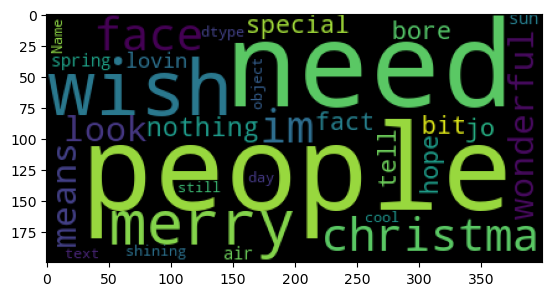

In [92]:
#Creates a wordcloud for the positive songs
cloud = wc.WordCloud()
a1 = str(positive['text'])

cloud1 = cloud.generate(a1)
plt.imshow(cloud1)

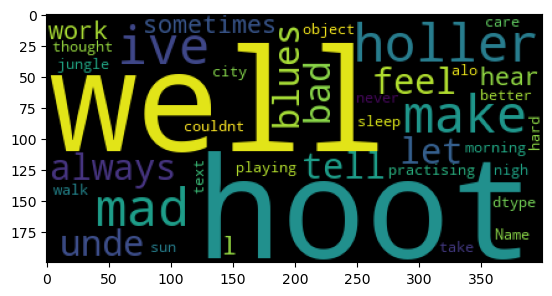

In [93]:
#Creates a word cloud for negative songs
a2 = str(negative['text'])
cloud2 = cloud.generate(a2)
plt.imshow(cloud2)

In [94]:
#A function to generate lyrics based on 1 song
def generate(lyric1,length):
    words = []
    next_word = random.choice(lyric1)
    words.append(next_word)
    
    while len(words)<length:
        next_word = random.choice(lyric1)
        words.append(next_word)
    
    return " ".join(words)

In [96]:
#Makes ngrams of size 3 for the 2 lists
n = ngrams_generator(positive['text'], 3)
n2 = ngrams_generator(negative['text'], 3)

In [97]:
#Positive generated lyrics
generate(n, 10)

'she makes feel home from school it all start giving it ive have love til take it down glad tidings christmas walking hours talking faith helping hand singing thanks all'

In [98]:
#Negative generated lyrics
generate(n2, 10)

'now were lookin see shape am so thought id play your violin kind wooh from there was only behind ill always its gotta be meet my friends its bad worse'

In [99]:
#Mixed lyrics
generate_lyrics(n,n2,10)

'singing thanks all im singing thanks am tiger people tired your tedious kin glad tidings without it ask can hear how them now were we sure play trust from fellow'

From this I can see what the computer views as "positive" and "negative" and how lyrics focused solely on that would look like